# Gradiente descendente

### Neste notebook, exploraremos a função de erro - em particular, a função do erro quadrático médio (MSE) para um problema de regressão. Também treinaremos um modelo básico de Machine Learning usando o Gradiente Descente para ajustar uma função hipótese aos nossos dados e, consequentemente, minimizar o erro

#### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar o exercício, vá ao menu do Colab e selecione a opção para fazer download do notebook.
    * Os notebooks têm extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * Para baixá-lo, vá até a opção **File** -> **Download .ipynb**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este exercício e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** na célula de texto abaixo.

# **Nome**: Hyago Vieira Lemes Barbosa Silva

# **Matrícula**: 922

## 1. Explorando o erro

Nesta seção, definimos um problema de regressão linear da forma $\hat{y} = a_0 + a_1 x$. Geramos o conjunto de dados que usaremos para encontrar a relação entre x e y, ou seja, chegar aos valores ótimos de $a_0$ e $a_1$.



---

**Pergunta 1**: Diz-se que na regressão linear, tentamos encontrar a função que melhor se ajusta aos dados. Você consegue pensar o por quê disso?

**Resposta:**

Porque basicamente precisamos de um chute tendo ruído ou não, em uma regressão lienar precisamos analisar sobre 2 coeficientes que são os pesoss da função hipótese, onde a0 e a1 representam início do chute começar a partir de um valor que deste ponto a diante irá decair e fazendo com que encontre futuramente depois de alguns passos de aprendizagem a partir das epocas um erro cada vez menor. Assim é preciso um chute havendo ruído ou não, ou também como feito no exercício sobre Regressão linear com ruído, uma estimativa de interpolação linear, para uma função que se ajuste pelos pontos, o que foi bem próximo do "chute". analisando coeficiente linear e angular, ou seja, respectivamente, o ponto onde toca o eixo y, e a diferenca para inclinação de 2 pontos para y e x. Ao fazer a função que se ajusta melhor aos dados, podemos ter a função que entrega de acordo com a entrada x, os valores do alvo ou target, y.

---



Abaixo, importamos três bibliotecas:


1.   [math](https://docs.python.org/3/library/math.html) - operações matemáticas básicas, e.g.: raíz quadrada, potência, etc.
2.   [matplotlib](https://matplotlib.org/) - visualização de dados
3.   [numpy](https://numpy.org/) - manipulação de arrays

In [1]:
# importando as bibliotecas que serão usadas.
import math
import matplotlib.pyplot as plt
import numpy as np

A célula abaixo calcula os valores $\hat{y}$ preditos para palpites de $a_0$ e $a_1$. Altere os valores dos dois pesos e explore como a saída da função hipótese e, consequentemente, o erro mudam para diferentes pesos.

---

**Pergunta 2**: Informe o erro para três valores diferentes de $a_0$ e $a_1$. (Execute as três células de código abaixo para cada par de valores de $a_0$ e $a_1$)

### **Resposta:**

1.   $a_0$ = -3, $a_1$ = 2, MSE = 28.186889110999978
2.   $a_0$ = 1, $a_1$ = -1 , MSE = 0.9845161509999998
3.   $a_0$ = 2, $a_1$ = -1, MSE: 0.011332151000000002


### _**Detalhes**_:

---

- _**TESTES**_ :

#### **1° teste**

$a_0$ = -3, $a_1$ = 2, MSE = 28.186889110999978 (muito alto)

#### **2° teste**

$a_0$ = 1, $a_1$ = -1 , MSE: 0.9845161509999998 (baixo)

#### **3° teste**

$a_0$ = 2, $a_1$ = -1, MSE: 0.011332151000000002 (melhor caso)

####       Observação:  
<font size=5px>

    no 2° teste vemos que basicamente encontramos uma reta colinear ou
    paralela da reta predita com a esperada portanto basta manipular o
    coeficiente linear. pode-se observar que possui uma passagem pelo
    eixo y, tocando em 2.


In [74]:
# Edite os valores pesos a0 e a1 para obter valores de erro diferentes.
# Execute esta célula novamente quando terminar de definir os novos pesos.
# Seu y será calculado como y = a0 + a1*x, então se a0 = -1 e a1 = 2, então y = -1 + 2x
a0 = 2# < Coloque um valor aqui >
a1 = -1 # < Coloque um valor aqui >

# Atributo.
x = np.array([[-1.0000],[-0.9800],[-0.9600],[-0.9400],[-0.9200],[-0.9000],[-0.8800],[-0.8600],[-0.8400],[-0.8200],[-0.8000],[-0.7800],[-0.7600],[-0.7400],[-0.7200],[-0.7000],[-0.6800],[-0.6600],[-0.6400],[-0.6200],[-0.6000],[-0.5800],[-0.5600],[-0.5400],[-0.5200],[-0.5000],[-0.4800],[-0.4600],[-0.4400],[-0.4200],[-0.4000],[-0.3800],[-0.3600],[-0.3400],[-0.3200],[-0.3000],[-0.2800],[-0.2600],[-0.2400],[-0.2200],[-0.2000],[-0.1800],[-0.1600],[-0.1400],[-0.1200],[-0.1000],[-0.0800],[-0.0600],[-0.0400],[-0.0200],[0.0000],[0.0200],[0.0400],[0.0600],[0.0800],[0.1000],[0.1200],[0.1400],[0.1600],[0.1800],[0.2000],[0.2200],[0.2400],[0.2600],[0.2800],[0.3000],[0.3200],[0.3400],[0.3600],[0.3800],[0.4000],[0.4200],[0.4400],[0.4600],[0.4800],[0.5000],[0.5200],[0.5400],[0.5600],[0.5800],[0.6000],[0.6200],[0.6400],[0.6600],[0.6800],[0.7000],[0.7200],[0.7400],[0.7600],[0.7800],[0.8000],[0.8200],[0.8400],[0.8600],[0.8800],[0.9000],[0.9200],[0.9400],[0.9600],[0.9800]])
x = x.reshape((len(x), ))

# Valores esperados (rótulos).
y = np.array([[2.8430],[3.1381],[2.9244],[2.7861],[2.9280],[2.7738],[2.8377],[2.7283],[2.9339],[2.8179],[2.9297],[2.9174],[2.9368],[2.6965],[2.4980],[2.6416],[2.4662],[2.7446],[2.8236],[2.5448],[2.5921],[2.6842],[2.2680],[2.5057],[2.4570],[2.4846],[2.6486],[2.5413],[2.3897],[2.4596],[2.2950],[2.2857],[2.4995],[2.4205],[2.3266],[2.2281],[2.3636],[2.2785],[2.1923],[2.2687],[2.1807],[2.1150],[2.2315],[2.0983],[2.0559],[2.0267],[2.0947],[1.9915],[2.0493],[2.0690],[2.1200],[1.9080],[1.9794],[1.9558],[1.7788],[1.9183],[1.9108],[1.8345],[1.8798],[1.8059],[1.9824],[1.7402],[1.6944],[1.6580],[1.6566],[1.5599],[1.5479],[1.4707],[1.6614],[1.7665],[1.5337],[1.3794],[1.4164],[1.7335],[1.5664],[1.4243],[1.5442],[1.3090],[1.4028],[1.3816],[1.6266],[1.4310],[1.4552],[1.4960],[1.2963],[1.2333],[1.2134],[1.2729],[1.2125],[1.2815],[1.1458],[0.9575],[1.3239],[1.1006],[1.0718],[1.0081],[1.0699],[0.9018],[1.1268],[0.9014]])
y = y.reshape((len(y), ))

y_hat = np.zeros((len(y), ))
for i, xi in enumerate(x):
    y_hat[i] = a0 + a1*xi     # Predições feitas com base nos valores definidos para os pesos.

print("y: " + str(y))
print("y_hat: " + str(y_hat))

y: [2.843  3.1381 2.9244 2.7861 2.928  2.7738 2.8377 2.7283 2.9339 2.8179
 2.9297 2.9174 2.9368 2.6965 2.498  2.6416 2.4662 2.7446 2.8236 2.5448
 2.5921 2.6842 2.268  2.5057 2.457  2.4846 2.6486 2.5413 2.3897 2.4596
 2.295  2.2857 2.4995 2.4205 2.3266 2.2281 2.3636 2.2785 2.1923 2.2687
 2.1807 2.115  2.2315 2.0983 2.0559 2.0267 2.0947 1.9915 2.0493 2.069
 2.12   1.908  1.9794 1.9558 1.7788 1.9183 1.9108 1.8345 1.8798 1.8059
 1.9824 1.7402 1.6944 1.658  1.6566 1.5599 1.5479 1.4707 1.6614 1.7665
 1.5337 1.3794 1.4164 1.7335 1.5664 1.4243 1.5442 1.309  1.4028 1.3816
 1.6266 1.431  1.4552 1.496  1.2963 1.2333 1.2134 1.2729 1.2125 1.2815
 1.1458 0.9575 1.3239 1.1006 1.0718 1.0081 1.0699 0.9018 1.1268 0.9014]
y_hat: [3.   2.98 2.96 2.94 2.92 2.9  2.88 2.86 2.84 2.82 2.8  2.78 2.76 2.74
 2.72 2.7  2.68 2.66 2.64 2.62 2.6  2.58 2.56 2.54 2.52 2.5  2.48 2.46
 2.44 2.42 2.4  2.38 2.36 2.34 2.32 2.3  2.28 2.26 2.24 2.22 2.2  2.18
 2.16 2.14 2.12 2.1  2.08 2.06 2.04 2.02 2.   1.98 1.96 1.94 1.92 1

Antes de prosseguirmos para o cálculo do erro, vamos visualizar a diferença entre os valores esperados e preditos. No gráfico de dispersão abaixo, os *pontos azuis* representam os valores esperados, os *pontos verdes* representam os valores preditos e as *linhas tracejadas vermelhas* representam a diferença entre os dois para cada amostra de dados individual.

Você pode ler mais sobre gráficos de dispersão da biblioteca matplotlib [aqui](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

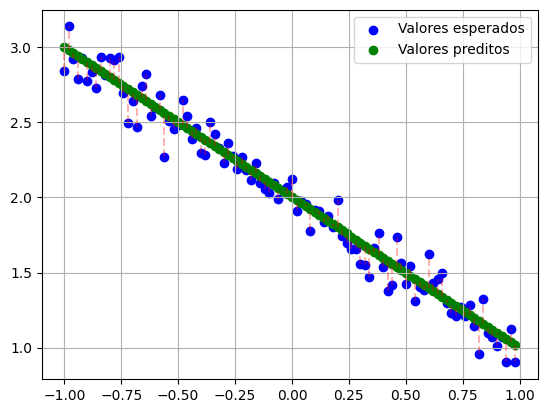

In [75]:
# Visualização do erro entre os valores esperados e preditos pela função hipótese.
plt.scatter(x, y, color='blue', label='Valores esperados')                    # valores esperados
plt.scatter(x, y_hat, color='green', label='Valores preditos')                # valores preditos
plt.vlines(x, ymin=np.minimum(y, y_hat), ymax=np.maximum(y, y_hat), color="red", linestyle='--', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

Nós poderíamos simplesmente pegar a média das diferenças entre os os valores esperados e preditos para calcular o erro do modelo. No entanto, a presença de erros negativos faria com que alguns erros se cancelassem, não dando uma representação precisa do erro total.

Portanto, a coisa mais inteligente a fazer aqui é elevar ao quadrado cada valor de erro individual e calcular a média de todos os erros individuais, ou seja, calcular o **MSE**.

In [76]:
# Vamos calcular o erro.
mse = 0
N = len(y) # Número total de amostras.
for i in range(0, N):
    squared_diff = (y[i] - y_hat[i]) ** 2
    mse += squared_diff

# Divide pelo número total de amostras.
mse /= N

print("MSE: " + str((mse)))

MSE: 0.011332151000000002


## 2. Minimizando o erro

Nesta seção, iremos minimizar o erro do nosso modelo de regressão, treinando-o com os dados fornecidos.

Primeiro, nós importamos a biblioteca:

1.   [tensorflow](https://www.tensorflow.org/) - biblioteca de código aberto para criar e treinar modelos de ML.

In [77]:
import tensorflow as tf

Para treinar nosso modelo de regressão linear, precisamos primeiro definir

+ (i) o modelo,
+ (ii) a função de erro e
+ (iii) o procedimento (i.e., algoritmo) de treinamento.

### Definindo o modelo de regressão linear

O modelo implementado abaixo representa a função hipótese $\hat{y} = a_0 + a_1 x$.

Portanto, o modelo gera (**retorna**) um valor de $\hat{y}$ para determinados $a_0$, $a_1$ e $x$ quando é chamado.

In [78]:
# Definindo nosso palpite inicial.
A0_INICIAL = 10.0
A1_INICIAL = 10.0

# Define nosso modelo de regressão.
class Model(object):
    def __init__(self, a0=A0_INICIAL, a1=A1_INICIAL):
        # Inicializando os pesos como variáveis do Tensorflow.
        self.a0 = tf.Variable(a0)
        self.a1 = tf.Variable(a1)

    # O método call é chamado toda a vez que passamos um valor de x para o modelo.
    def __call__(self, x):
        return self.a0 + self.a1*x

**OBS**.: Dado uma valor de x, o método `__call__()` retorna um valor de $\hat{y}$. Sabemos que o melhor formato para a função hipótese, ou seja, o modelo, é $\hat{y} = a_0 + a_1 x$. Portanto, o método `__call__()` retorna `self.a0 + self.a1 * x`.

### Definindo a função de erro

Em seguida, definimos a função de erro, a qual irá retornar o erro quadrático médio (MSE).

A função do Tensorflow `tf.reduce_mean()` calcula a média do tensor (i.e., vetor/array) de entrada. Leia mais sobre ela [aqui](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean).

No caso do código abaixo, a função `tf.reduce_mean()` calcula a média dos erros individuais.

In [79]:
# Definindo nossa função de erro.
def erro(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

### Definindo o procedimento (algoritmo) de treinamento

Aqui, o algoritmo do gradiente descendente é usado para o treinamento do modelo.

Definimos uma função chamada `train` que executa uma **iteração do gradiente descendente** usando **todas** as amostras em nosso conjunto de dados (ou seja, usa todos os valores $x$ e $y$ disponíveis para treinamento).

Uma iteração do algoritmo de otimização do gradiente descendente envolve:

1. o cálculo do erro
2. o cálculo das derivadas da função de erro em relação ao pesos individuais (i.e., $a_0$ e $a_1$)
3. a atualização dos pesos do modelo com as derivadas calculadas (i.e., vetor gradiente)

**API Gradient Tape do TensorFlow**

O cálculo das derivadas parciais da função de erro em relação aos pesos é feito automaticamente por um objeto da classe `GradientTape()` do TensorFlow.

Você pode aprender mais sobre a classe `GradientTape()` em https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [80]:
# Definindo o processo de treinamento (ou atualização dos pesos)
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        # Erro atual.
        current_error = erro(model(inputs), outputs)

        # Aqui é onde diferenciamos a função de erro em relação aos pesos do modelo.
        da0, da1 = t.gradient(current_error, [model.a0, model.a1])      # derro/da0, derro/da1

        # E aqui é onde atualizamos os pesos do modelo com base no passo de aprendizagem escolhido.
        model.a0.assign_sub(learning_rate * da0)   # model.a0 = model.a0 - learning_rate*da0
        model.a1.assign_sub(learning_rate * da1)   # model.a1 = model.a1 - learning_rate*da1

        # Retorna o erro atual.
        return current_error

---


**Pergunta 3**: No código acima, antes de treinar o modelo, quais são as três coisas que precisamos definir?

**Resposta:**

1° o modelo; (função de hipótese, chute inicial)

2° a função de erro e; (EQM ou MSE, RMSE...)

3° o procedimento (i.e., algoritmo) de treinamento. (processamento e atualização dos pessos)

---

---

**Pergunta 4**: Qual versão do gradiente descendente está implentada no código acima?

**Resposta:**

Batelada, pois usa todas as amostras de entrada.Convergência para o mínimo global é garantida devido a função de erro convexa MSE ou EQM. Pode ser computacionalmente complexo, porém possuimos poucos pontos, é o melhor caso para se usar neste exemplo.

---

### Treinando o modelo

Agora que definimos todas as funções individuais que vamos precisar, é hora de juntá-las.

Inicialmente, definimos o passo de aprendizagem e o número de épocas de treinamento.

Em seguida, instanciamos o modelo.

Na sequência, treinamos o modelo por várias épocas. Para cada época, calculamos e armazenamos os valores dos pesos ($a_0$ e $a_1$) e o erro.

Observe a diminuição ou aumento do erro (dependendo do valor do passo de aprendizagem) à medida que as épocas passam.

**OBS**.: Você vai precisar encontrar valores para o passo de aprendizagem e número de épocas de forma que o gradiente descendente convirja.

---

# _**Detalhes**_:

## **Teste 1**:

#### **1° valor**
<font size=5px>

    LEARNING_RATE = 0.005
    epochs = 50

#### **2° valor**
<font size=5px>

    epochs = 100
    LEARNING_RATE = 0.05

#### **3° valor**
<font size=5px>

    LEARNING_RATE = 0.09
    epochs = 200

    Convergiu para loss = 0.01114
    Epoca = 145

---
## **Teste 2**:

#### **1° valor**
<font size=5px>

    LEARNING_RATE = 0.5
    epochs = 100
    
    Convergiu para loss = 0.01114
    Epoca = 23

In [91]:
# Passo de aprendizagem.
# testes
LEARNING_RATE = 0.09

# Número de épocas.
epochs = 200

# Instancia o modelo.
model = Model()

# Coletando o histórico de valores a0 e a1 para plotar mais tarde.
list_a0, list_a1 = [], []
erros = []

# Laço (loop) de treinamento.
for epoch in range(epochs):

    # Armazena os valores dos pesos.
    list_a0.append(model.a0.numpy())
    list_a1.append(model.a1.numpy())

    # Iteração de treinamento.
    current_error = train(model, x, y, learning_rate=LEARNING_RATE)

    # Armzena os erros ao longo das épocas de treinamento.
    erros.append(current_error)

    # Imprime os erros ao longo das épocas de treinamento.
    print('Época %2d: a0=%1.2f a1=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Época  0: a0=-3.00 a1=2.00, loss=28.18689
Época  1: a0=-2.10 a1=1.81, loss=19.55962
Época  2: a0=-1.36 a1=1.63, loss=13.68869
Época  3: a0=-0.75 a1=1.47, loss=9.67920
Época  4: a0=-0.25 a1=1.32, loss=6.92848
Época  5: a0=0.15 a1=1.17, loss=5.03050
Época  6: a0=0.49 a1=1.04, loss=3.71150
Época  7: a0=0.76 a1=0.91, loss=2.78678
Época  8: a0=0.99 a1=0.80, loss=2.13156
Época  9: a0=1.17 a1=0.69, loss=1.66144
Época 10: a0=1.32 a1=0.58, loss=1.31921
Época 11: a0=1.44 a1=0.49, loss=1.06601
Época 12: a0=1.54 a1=0.40, loss=0.87536
Época 13: a0=1.63 a1=0.31, loss=0.72914
Época 14: a0=1.69 a1=0.23, loss=0.61490
Época 15: a0=1.75 a1=0.16, loss=0.52400
Época 16: a0=1.79 a1=0.09, loss=0.45045
Época 17: a0=1.83 a1=0.02, loss=0.39000
Época 18: a0=1.86 a1=-0.04, loss=0.33964
Época 19: a0=1.88 a1=-0.10, loss=0.29719
Época 20: a0=1.90 a1=-0.15, loss=0.26107
Época 21: a0=1.92 a1=-0.20, loss=0.23008
Época 22: a0=1.93 a1=-0.25, loss=0.20332
Época 23: a0=1.94 a1=-0.30, loss=0.18009
Época 24: a0=1.95 a1=-0.34

### Plote os valores dos pesos ao longo das épocas de treinamento.

Abaixo está um gráfico dos valores dos pesos do modelo $a_0$ e $a_1$ (eixo y) ao longo das épocas (eixo x). À medida que o modelo é treinado, observe como os valores de $a_0$ e $a_1$ se estabilizam em um valor.

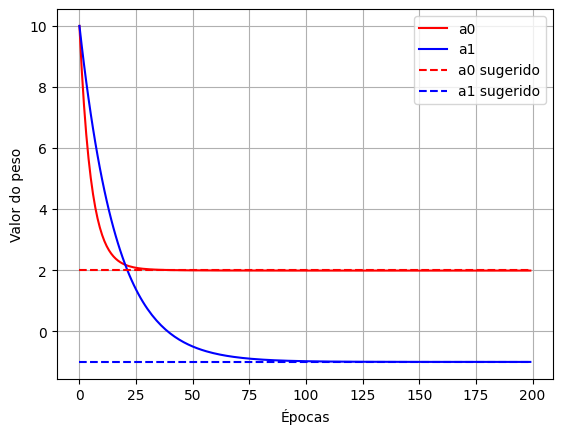

In [83]:
# Plote os valores de a0 e a1 para cada época de treinamento em relação aos valores verdadeiros.
TRUE_a0 = 2
TRUE_a1 = -1

xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b')
plt.plot([TRUE_a0] * epochs, 'r--', [TRUE_a1] * epochs, 'b--')
plt.legend(['a0', 'a1', 'a0 sugerido', 'a1 sugerido'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

### Plote o MSE ao longo das épocas de treinamento

O gráfico abaixo mostra o MSE ao longo do treinamento do modelo.

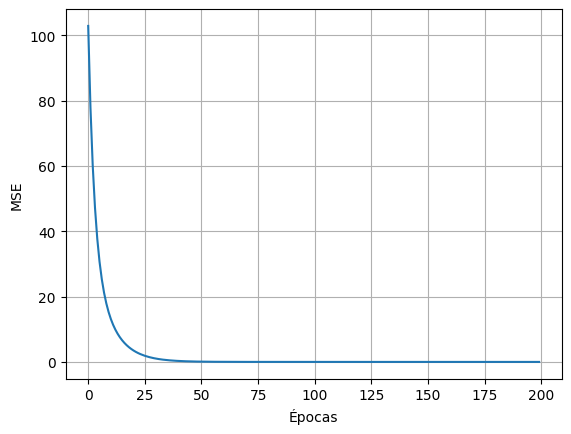

In [84]:
plt.plot(range(epochs), erros)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()

---

**Pergunta 5**: Após observar os últimos dois gráficos acima, podemos dizer que o algoritmo convergiu?

**Resposta:**

Sim, pois não há mais como haver um erro menor, do que foi encontrado, o gradiente convergiu para o menor valor que ele encontrou com os valores de pesos, devido ao erro, e como a equação se baseia em apenas um neurônio, com apenas a equação de definição a equação é uma reta, e isto se mantém.

---

### Plote uma figura comparando os dados de treinamento e a melhor função hipótese.

# **1° teste para função hipótese**

$a_0$ = -3, $a_1$ = 2, MSE = 28.186889110999978 (muito alto)



In [85]:
a0 = -3
a1 = 2

x = np.array([[-1.0000],[-0.9800],[-0.9600],[-0.9400],[-0.9200],[-0.9000],[-0.8800],[-0.8600],[-0.8400],[-0.8200],[-0.8000],[-0.7800],[-0.7600],[-0.7400],[-0.7200],[-0.7000],[-0.6800],[-0.6600],[-0.6400],[-0.6200],[-0.6000],[-0.5800],[-0.5600],[-0.5400],[-0.5200],[-0.5000],[-0.4800],[-0.4600],[-0.4400],[-0.4200],[-0.4000],[-0.3800],[-0.3600],[-0.3400],[-0.3200],[-0.3000],[-0.2800],[-0.2600],[-0.2400],[-0.2200],[-0.2000],[-0.1800],[-0.1600],[-0.1400],[-0.1200],[-0.1000],[-0.0800],[-0.0600],[-0.0400],[-0.0200],[0.0000],[0.0200],[0.0400],[0.0600],[0.0800],[0.1000],[0.1200],[0.1400],[0.1600],[0.1800],[0.2000],[0.2200],[0.2400],[0.2600],[0.2800],[0.3000],[0.3200],[0.3400],[0.3600],[0.3800],[0.4000],[0.4200],[0.4400],[0.4600],[0.4800],[0.5000],[0.5200],[0.5400],[0.5600],[0.5800],[0.6000],[0.6200],[0.6400],[0.6600],[0.6800],[0.7000],[0.7200],[0.7400],[0.7600],[0.7800],[0.8000],[0.8200],[0.8400],[0.8600],[0.8800],[0.9000],[0.9200],[0.9400],[0.9600],[0.9800]])
x = x.reshape((len(x), ))

y = np.array([[2.8430],[3.1381],[2.9244],[2.7861],[2.9280],[2.7738],[2.8377],[2.7283],[2.9339],[2.8179],[2.9297],[2.9174],[2.9368],[2.6965],[2.4980],[2.6416],[2.4662],[2.7446],[2.8236],[2.5448],[2.5921],[2.6842],[2.2680],[2.5057],[2.4570],[2.4846],[2.6486],[2.5413],[2.3897],[2.4596],[2.2950],[2.2857],[2.4995],[2.4205],[2.3266],[2.2281],[2.3636],[2.2785],[2.1923],[2.2687],[2.1807],[2.1150],[2.2315],[2.0983],[2.0559],[2.0267],[2.0947],[1.9915],[2.0493],[2.0690],[2.1200],[1.9080],[1.9794],[1.9558],[1.7788],[1.9183],[1.9108],[1.8345],[1.8798],[1.8059],[1.9824],[1.7402],[1.6944],[1.6580],[1.6566],[1.5599],[1.5479],[1.4707],[1.6614],[1.7665],[1.5337],[1.3794],[1.4164],[1.7335],[1.5664],[1.4243],[1.5442],[1.3090],[1.4028],[1.3816],[1.6266],[1.4310],[1.4552],[1.4960],[1.2963],[1.2333],[1.2134],[1.2729],[1.2125],[1.2815],[1.1458],[0.9575],[1.3239],[1.1006],[1.0718],[1.0081],[1.0699],[0.9018],[1.1268],[0.9014]])
y = y.reshape((len(y), ))

y_hat = np.zeros((len(y), ))
for i, xi in enumerate(x):
    y_hat[i] = a0 + a1*xi

print("y: " + str(y))
print("\ny_suposto: " + str(y_hat))

mse = 0
N = len(y)
for i in range(0, N):
    squared_diff = (y[i] - y_hat[i]) ** 2
    mse += squared_diff

mse /= N

print("\nMSE: " + str((mse)))

y: [2.843  3.1381 2.9244 2.7861 2.928  2.7738 2.8377 2.7283 2.9339 2.8179
 2.9297 2.9174 2.9368 2.6965 2.498  2.6416 2.4662 2.7446 2.8236 2.5448
 2.5921 2.6842 2.268  2.5057 2.457  2.4846 2.6486 2.5413 2.3897 2.4596
 2.295  2.2857 2.4995 2.4205 2.3266 2.2281 2.3636 2.2785 2.1923 2.2687
 2.1807 2.115  2.2315 2.0983 2.0559 2.0267 2.0947 1.9915 2.0493 2.069
 2.12   1.908  1.9794 1.9558 1.7788 1.9183 1.9108 1.8345 1.8798 1.8059
 1.9824 1.7402 1.6944 1.658  1.6566 1.5599 1.5479 1.4707 1.6614 1.7665
 1.5337 1.3794 1.4164 1.7335 1.5664 1.4243 1.5442 1.309  1.4028 1.3816
 1.6266 1.431  1.4552 1.496  1.2963 1.2333 1.2134 1.2729 1.2125 1.2815
 1.1458 0.9575 1.3239 1.1006 1.0718 1.0081 1.0699 0.9018 1.1268 0.9014]

y_suposto: [-5.   -4.96 -4.92 -4.88 -4.84 -4.8  -4.76 -4.72 -4.68 -4.64 -4.6  -4.56
 -4.52 -4.48 -4.44 -4.4  -4.36 -4.32 -4.28 -4.24 -4.2  -4.16 -4.12 -4.08
 -4.04 -4.   -3.96 -3.92 -3.88 -3.84 -3.8  -3.76 -3.72 -3.68 -3.64 -3.6
 -3.56 -3.52 -3.48 -3.44 -3.4  -3.36 -3.32 -3.28 -3.24 -3

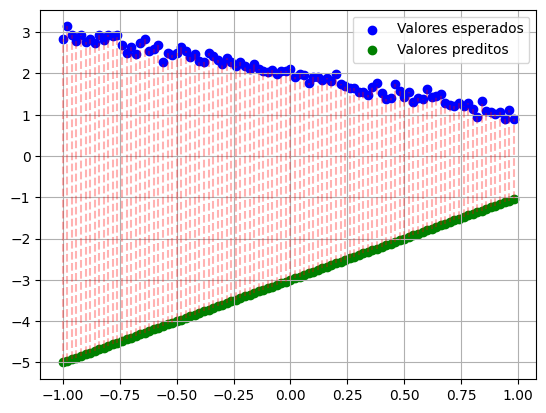

In [86]:
plt.scatter(x, y, color='blue', label='Valores esperados')
plt.scatter(x, y_hat, color='green', label='Valores preditos')
plt.vlines(x, ymin=np.minimum(y, y_hat), ymax=np.maximum(y, y_hat), color="red", linestyle='--', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

In [87]:
A0_INICIAL = -3.0
A1_INICIAL = 2.0

class Model(object):
    def __init__(self, a0=A0_INICIAL, a1=A1_INICIAL):

        self.a0 = tf.Variable(a0)
        self.a1 = tf.Variable(a1)

    def __call__(self, x):
        return self.a0 + self.a1*x

In [88]:
LEARNING_RATE = 0.09

epochs = 200

model = Model()

list_a0, list_a1 = [], []
erros = []

for epoch in range(epochs):

    list_a0.append(model.a0.numpy())
    list_a1.append(model.a1.numpy())

    current_error = train(model, x, y, learning_rate=LEARNING_RATE)

    erros.append(current_error)

    print('Época %2d: a0=%1.2f a1=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Época  0: a0=-3.00 a1=2.00, loss=28.18689
Época  1: a0=-2.10 a1=1.81, loss=19.55962
Época  2: a0=-1.36 a1=1.63, loss=13.68869
Época  3: a0=-0.75 a1=1.47, loss=9.67920
Época  4: a0=-0.25 a1=1.32, loss=6.92848
Época  5: a0=0.15 a1=1.17, loss=5.03050
Época  6: a0=0.49 a1=1.04, loss=3.71150
Época  7: a0=0.76 a1=0.91, loss=2.78678
Época  8: a0=0.99 a1=0.80, loss=2.13156
Época  9: a0=1.17 a1=0.69, loss=1.66144
Época 10: a0=1.32 a1=0.58, loss=1.31921
Época 11: a0=1.44 a1=0.49, loss=1.06601
Época 12: a0=1.54 a1=0.40, loss=0.87536
Época 13: a0=1.63 a1=0.31, loss=0.72914
Época 14: a0=1.69 a1=0.23, loss=0.61490
Época 15: a0=1.75 a1=0.16, loss=0.52400
Época 16: a0=1.79 a1=0.09, loss=0.45045
Época 17: a0=1.83 a1=0.02, loss=0.39000
Época 18: a0=1.86 a1=-0.04, loss=0.33964
Época 19: a0=1.88 a1=-0.10, loss=0.29719
Época 20: a0=1.90 a1=-0.15, loss=0.26107
Época 21: a0=1.92 a1=-0.20, loss=0.23008
Época 22: a0=1.93 a1=-0.25, loss=0.20332
Época 23: a0=1.94 a1=-0.30, loss=0.18009
Época 24: a0=1.95 a1=-0.34

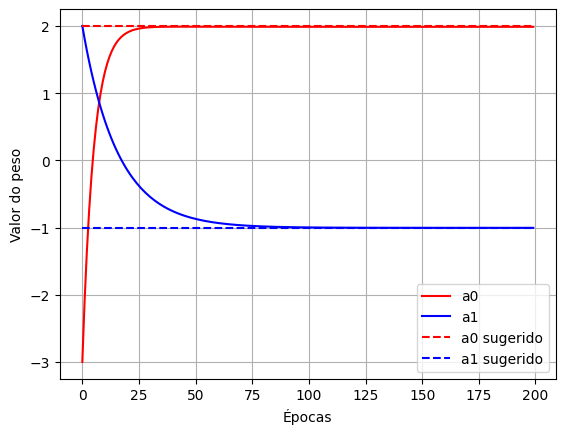

In [64]:
TRUE_a0 = 2
TRUE_a1 = -1

xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b')
plt.plot([TRUE_a0] * epochs, 'r--', [TRUE_a1] * epochs, 'b--')
plt.legend(['a0', 'a1', 'a0 sugerido', 'a1 sugerido'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

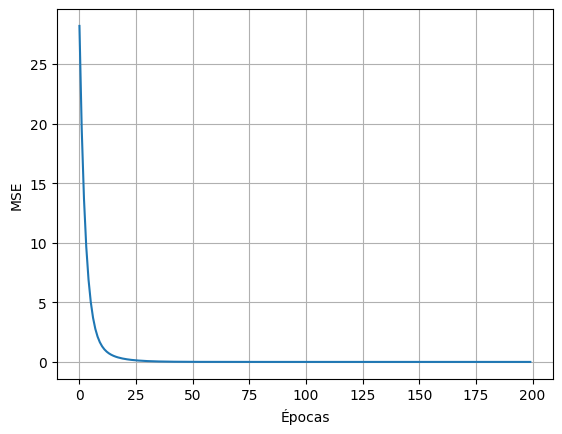

In [65]:
plt.plot(range(epochs), erros)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()

# **2° teste para função hipótese**

$a_0$ = 1, $a_1$ = -1 , MSE: 0.9845161509999998 (baixo)

In [66]:
a0 = 1
a1 = -1

x = np.array([[-1.0000],[-0.9800],[-0.9600],[-0.9400],[-0.9200],[-0.9000],[-0.8800],[-0.8600],[-0.8400],[-0.8200],[-0.8000],[-0.7800],[-0.7600],[-0.7400],[-0.7200],[-0.7000],[-0.6800],[-0.6600],[-0.6400],[-0.6200],[-0.6000],[-0.5800],[-0.5600],[-0.5400],[-0.5200],[-0.5000],[-0.4800],[-0.4600],[-0.4400],[-0.4200],[-0.4000],[-0.3800],[-0.3600],[-0.3400],[-0.3200],[-0.3000],[-0.2800],[-0.2600],[-0.2400],[-0.2200],[-0.2000],[-0.1800],[-0.1600],[-0.1400],[-0.1200],[-0.1000],[-0.0800],[-0.0600],[-0.0400],[-0.0200],[0.0000],[0.0200],[0.0400],[0.0600],[0.0800],[0.1000],[0.1200],[0.1400],[0.1600],[0.1800],[0.2000],[0.2200],[0.2400],[0.2600],[0.2800],[0.3000],[0.3200],[0.3400],[0.3600],[0.3800],[0.4000],[0.4200],[0.4400],[0.4600],[0.4800],[0.5000],[0.5200],[0.5400],[0.5600],[0.5800],[0.6000],[0.6200],[0.6400],[0.6600],[0.6800],[0.7000],[0.7200],[0.7400],[0.7600],[0.7800],[0.8000],[0.8200],[0.8400],[0.8600],[0.8800],[0.9000],[0.9200],[0.9400],[0.9600],[0.9800]])
x = x.reshape((len(x), ))

y = np.array([[2.8430],[3.1381],[2.9244],[2.7861],[2.9280],[2.7738],[2.8377],[2.7283],[2.9339],[2.8179],[2.9297],[2.9174],[2.9368],[2.6965],[2.4980],[2.6416],[2.4662],[2.7446],[2.8236],[2.5448],[2.5921],[2.6842],[2.2680],[2.5057],[2.4570],[2.4846],[2.6486],[2.5413],[2.3897],[2.4596],[2.2950],[2.2857],[2.4995],[2.4205],[2.3266],[2.2281],[2.3636],[2.2785],[2.1923],[2.2687],[2.1807],[2.1150],[2.2315],[2.0983],[2.0559],[2.0267],[2.0947],[1.9915],[2.0493],[2.0690],[2.1200],[1.9080],[1.9794],[1.9558],[1.7788],[1.9183],[1.9108],[1.8345],[1.8798],[1.8059],[1.9824],[1.7402],[1.6944],[1.6580],[1.6566],[1.5599],[1.5479],[1.4707],[1.6614],[1.7665],[1.5337],[1.3794],[1.4164],[1.7335],[1.5664],[1.4243],[1.5442],[1.3090],[1.4028],[1.3816],[1.6266],[1.4310],[1.4552],[1.4960],[1.2963],[1.2333],[1.2134],[1.2729],[1.2125],[1.2815],[1.1458],[0.9575],[1.3239],[1.1006],[1.0718],[1.0081],[1.0699],[0.9018],[1.1268],[0.9014]])
y = y.reshape((len(y), ))

y_hat = np.zeros((len(y), ))
for i, xi in enumerate(x):
    y_hat[i] = a0 + a1*xi

print("y: " + str(y))
print("\ny_suposto: " + str(y_hat))

mse = 0
N = len(y)
for i in range(0, N):
    squared_diff = (y[i] - y_hat[i]) ** 2
    mse += squared_diff

mse /= N

print("\nMSE: " + str((mse)))

y: [2.843  3.1381 2.9244 2.7861 2.928  2.7738 2.8377 2.7283 2.9339 2.8179
 2.9297 2.9174 2.9368 2.6965 2.498  2.6416 2.4662 2.7446 2.8236 2.5448
 2.5921 2.6842 2.268  2.5057 2.457  2.4846 2.6486 2.5413 2.3897 2.4596
 2.295  2.2857 2.4995 2.4205 2.3266 2.2281 2.3636 2.2785 2.1923 2.2687
 2.1807 2.115  2.2315 2.0983 2.0559 2.0267 2.0947 1.9915 2.0493 2.069
 2.12   1.908  1.9794 1.9558 1.7788 1.9183 1.9108 1.8345 1.8798 1.8059
 1.9824 1.7402 1.6944 1.658  1.6566 1.5599 1.5479 1.4707 1.6614 1.7665
 1.5337 1.3794 1.4164 1.7335 1.5664 1.4243 1.5442 1.309  1.4028 1.3816
 1.6266 1.431  1.4552 1.496  1.2963 1.2333 1.2134 1.2729 1.2125 1.2815
 1.1458 0.9575 1.3239 1.1006 1.0718 1.0081 1.0699 0.9018 1.1268 0.9014]

y_suposto: [2.   1.98 1.96 1.94 1.92 1.9  1.88 1.86 1.84 1.82 1.8  1.78 1.76 1.74
 1.72 1.7  1.68 1.66 1.64 1.62 1.6  1.58 1.56 1.54 1.52 1.5  1.48 1.46
 1.44 1.42 1.4  1.38 1.36 1.34 1.32 1.3  1.28 1.26 1.24 1.22 1.2  1.18
 1.16 1.14 1.12 1.1  1.08 1.06 1.04 1.02 1.   0.98 0.96 0.94 0

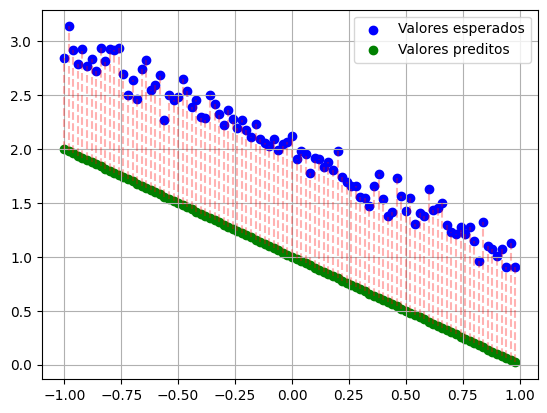

In [67]:
plt.scatter(x, y, color='blue', label='Valores esperados')
plt.scatter(x, y_hat, color='green', label='Valores preditos')
plt.vlines(x, ymin=np.minimum(y, y_hat), ymax=np.maximum(y, y_hat), color="red", linestyle='--', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

In [70]:
A0_INICIAL = 1.0
A1_INICIAL = -1.0

class Model(object):
    def __init__(self, a0=A0_INICIAL, a1=A1_INICIAL):

        self.a0 = tf.Variable(a0)
        self.a1 = tf.Variable(a1)

    def __call__(self, x):
        return self.a0 + self.a1*x

In [71]:
LEARNING_RATE = 0.09

epochs = 200

model = Model()

list_a0, list_a1 = [], []
erros = []

for epoch in range(epochs):

    list_a0.append(model.a0.numpy())
    list_a1.append(model.a1.numpy())

    current_error = train(model, x, y, learning_rate=LEARNING_RATE)

    erros.append(current_error)

    print('Época %2d: a0=%1.2f a1=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Época  0: a0=1.00 a1=-1.00, loss=0.98452
Época  1: a0=1.18 a1=-1.00, loss=0.66560
Época  2: a0=1.32 a1=-1.00, loss=0.45118
Época  3: a0=1.44 a1=-1.00, loss=0.30701
Época  4: a0=1.54 a1=-1.01, loss=0.21008
Época  5: a0=1.62 a1=-1.01, loss=0.14490
Época  6: a0=1.69 a1=-1.01, loss=0.10108
Época  7: a0=1.74 a1=-1.01, loss=0.07162
Época  8: a0=1.78 a1=-1.01, loss=0.05181
Época  9: a0=1.82 a1=-1.01, loss=0.03849
Época 10: a0=1.85 a1=-1.01, loss=0.02953
Época 11: a0=1.88 a1=-1.01, loss=0.02351
Época 12: a0=1.90 a1=-1.01, loss=0.01946
Época 13: a0=1.91 a1=-1.01, loss=0.01674
Época 14: a0=1.93 a1=-1.01, loss=0.01491
Época 15: a0=1.94 a1=-1.01, loss=0.01367
Época 16: a0=1.95 a1=-1.01, loss=0.01285
Época 17: a0=1.95 a1=-1.01, loss=0.01229
Época 18: a0=1.96 a1=-1.01, loss=0.01192
Época 19: a0=1.96 a1=-1.01, loss=0.01166
Época 20: a0=1.97 a1=-1.01, loss=0.01149
Época 21: a0=1.97 a1=-1.01, loss=0.01138
Época 22: a0=1.97 a1=-1.01, loss=0.01130
Época 23: a0=1.98 a1=-1.01, loss=0.01125
Época 24: a0=1.9

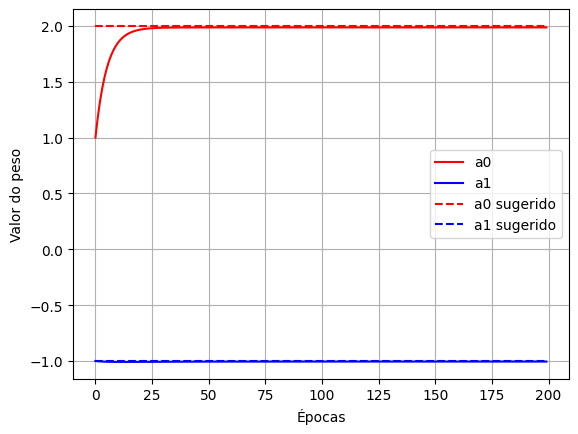

In [72]:
TRUE_a0 = 2
TRUE_a1 = -1

xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b')
plt.plot([TRUE_a0] * epochs, 'r--', [TRUE_a1] * epochs, 'b--')
plt.legend(['a0', 'a1', 'a0 sugerido', 'a1 sugerido'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

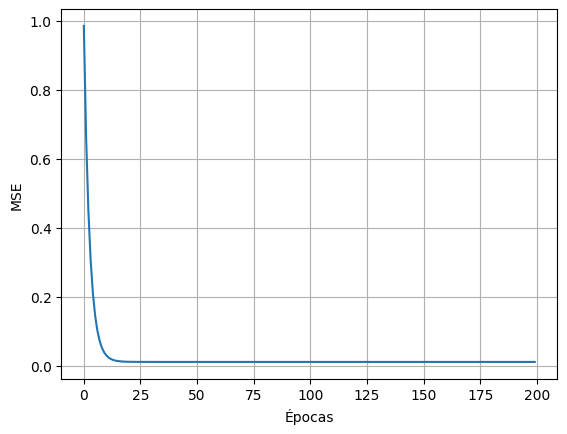

In [73]:
plt.plot(range(epochs), erros)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()

#### **3° teste**

$a_0$ = 2, $a_1$ = -1, MSE: 0.011332151000000002 (melhor caso) Feito anteriormente, mostrado todo passo a passo, pois praticamente teremos o valor que chega mais perto da conversão, direta, os gráficos parecerao que tem discontiuidade pois serão valores muito próximos! Por isso o chute inicial foi 10, 10 para a0 e a1, para iniciar com valores mais distantes.


In [101]:
a0 = 2
a1 = -1

x = np.array([[-1.0000],[-0.9800],[-0.9600],[-0.9400],[-0.9200],[-0.9000],[-0.8800],[-0.8600],[-0.8400],[-0.8200],[-0.8000],[-0.7800],[-0.7600],[-0.7400],[-0.7200],[-0.7000],[-0.6800],[-0.6600],[-0.6400],[-0.6200],[-0.6000],[-0.5800],[-0.5600],[-0.5400],[-0.5200],[-0.5000],[-0.4800],[-0.4600],[-0.4400],[-0.4200],[-0.4000],[-0.3800],[-0.3600],[-0.3400],[-0.3200],[-0.3000],[-0.2800],[-0.2600],[-0.2400],[-0.2200],[-0.2000],[-0.1800],[-0.1600],[-0.1400],[-0.1200],[-0.1000],[-0.0800],[-0.0600],[-0.0400],[-0.0200],[0.0000],[0.0200],[0.0400],[0.0600],[0.0800],[0.1000],[0.1200],[0.1400],[0.1600],[0.1800],[0.2000],[0.2200],[0.2400],[0.2600],[0.2800],[0.3000],[0.3200],[0.3400],[0.3600],[0.3800],[0.4000],[0.4200],[0.4400],[0.4600],[0.4800],[0.5000],[0.5200],[0.5400],[0.5600],[0.5800],[0.6000],[0.6200],[0.6400],[0.6600],[0.6800],[0.7000],[0.7200],[0.7400],[0.7600],[0.7800],[0.8000],[0.8200],[0.8400],[0.8600],[0.8800],[0.9000],[0.9200],[0.9400],[0.9600],[0.9800]])
x = x.reshape((len(x), ))

y = np.array([[2.8430],[3.1381],[2.9244],[2.7861],[2.9280],[2.7738],[2.8377],[2.7283],[2.9339],[2.8179],[2.9297],[2.9174],[2.9368],[2.6965],[2.4980],[2.6416],[2.4662],[2.7446],[2.8236],[2.5448],[2.5921],[2.6842],[2.2680],[2.5057],[2.4570],[2.4846],[2.6486],[2.5413],[2.3897],[2.4596],[2.2950],[2.2857],[2.4995],[2.4205],[2.3266],[2.2281],[2.3636],[2.2785],[2.1923],[2.2687],[2.1807],[2.1150],[2.2315],[2.0983],[2.0559],[2.0267],[2.0947],[1.9915],[2.0493],[2.0690],[2.1200],[1.9080],[1.9794],[1.9558],[1.7788],[1.9183],[1.9108],[1.8345],[1.8798],[1.8059],[1.9824],[1.7402],[1.6944],[1.6580],[1.6566],[1.5599],[1.5479],[1.4707],[1.6614],[1.7665],[1.5337],[1.3794],[1.4164],[1.7335],[1.5664],[1.4243],[1.5442],[1.3090],[1.4028],[1.3816],[1.6266],[1.4310],[1.4552],[1.4960],[1.2963],[1.2333],[1.2134],[1.2729],[1.2125],[1.2815],[1.1458],[0.9575],[1.3239],[1.1006],[1.0718],[1.0081],[1.0699],[0.9018],[1.1268],[0.9014]])
y = y.reshape((len(y), ))

y_hat = np.zeros((len(y), ))
for i, xi in enumerate(x):
    y_hat[i] = a0 + a1*xi

print("y: " + str(y))
print("\ny_suposto: " + str(y_hat))

mse = 0
N = len(y)
for i in range(0, N):
    squared_diff = (y[i] - y_hat[i]) ** 2
    mse += squared_diff

mse /= N

print("\nMSE: " + str((mse)))

y: [2.843  3.1381 2.9244 2.7861 2.928  2.7738 2.8377 2.7283 2.9339 2.8179
 2.9297 2.9174 2.9368 2.6965 2.498  2.6416 2.4662 2.7446 2.8236 2.5448
 2.5921 2.6842 2.268  2.5057 2.457  2.4846 2.6486 2.5413 2.3897 2.4596
 2.295  2.2857 2.4995 2.4205 2.3266 2.2281 2.3636 2.2785 2.1923 2.2687
 2.1807 2.115  2.2315 2.0983 2.0559 2.0267 2.0947 1.9915 2.0493 2.069
 2.12   1.908  1.9794 1.9558 1.7788 1.9183 1.9108 1.8345 1.8798 1.8059
 1.9824 1.7402 1.6944 1.658  1.6566 1.5599 1.5479 1.4707 1.6614 1.7665
 1.5337 1.3794 1.4164 1.7335 1.5664 1.4243 1.5442 1.309  1.4028 1.3816
 1.6266 1.431  1.4552 1.496  1.2963 1.2333 1.2134 1.2729 1.2125 1.2815
 1.1458 0.9575 1.3239 1.1006 1.0718 1.0081 1.0699 0.9018 1.1268 0.9014]

y_suposto: [3.   2.98 2.96 2.94 2.92 2.9  2.88 2.86 2.84 2.82 2.8  2.78 2.76 2.74
 2.72 2.7  2.68 2.66 2.64 2.62 2.6  2.58 2.56 2.54 2.52 2.5  2.48 2.46
 2.44 2.42 2.4  2.38 2.36 2.34 2.32 2.3  2.28 2.26 2.24 2.22 2.2  2.18
 2.16 2.14 2.12 2.1  2.08 2.06 2.04 2.02 2.   1.98 1.96 1.94 1

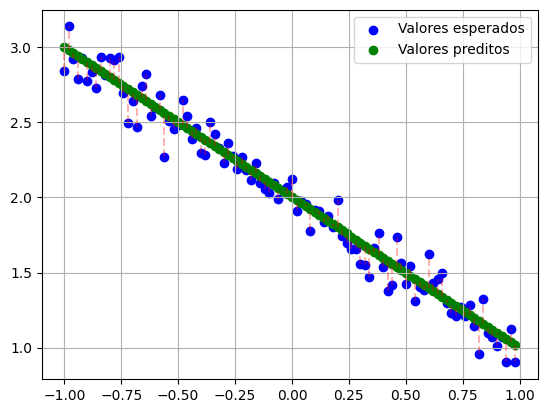

In [102]:
plt.scatter(x, y, color='blue', label='Valores esperados')
plt.scatter(x, y_hat, color='green', label='Valores preditos')
plt.vlines(x, ymin=np.minimum(y, y_hat), ymax=np.maximum(y, y_hat), color="red", linestyle='--', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

In [103]:
A0_INICIAL = 2.0
A1_INICIAL = -1.0

class Model(object):
    def __init__(self, a0=A0_INICIAL, a1=A1_INICIAL):

        self.a0 = tf.Variable(a0)
        self.a1 = tf.Variable(a1)

    def __call__(self, x):
        return self.a0 + self.a1*x

In [104]:
LEARNING_RATE = 0.09

epochs = 200

model = Model()

list_a0, list_a1 = [], []
erros = []

for epoch in range(epochs):

    list_a0.append(model.a0.numpy())
    list_a1.append(model.a1.numpy())

    current_error = train(model, x, y, learning_rate=LEARNING_RATE)

    erros.append(current_error)

    print('Época %2d: a0=%1.2f a1=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Época  0: a0=2.00 a1=-1.00, loss=0.01133
Época  1: a0=2.00 a1=-1.00, loss=0.01127
Época  2: a0=2.00 a1=-1.00, loss=0.01123
Época  3: a0=1.99 a1=-1.00, loss=0.01120
Época  4: a0=1.99 a1=-1.00, loss=0.01119
Época  5: a0=1.99 a1=-1.00, loss=0.01117
Época  6: a0=1.99 a1=-1.00, loss=0.01117
Época  7: a0=1.99 a1=-1.00, loss=0.01116
Época  8: a0=1.99 a1=-1.00, loss=0.01116
Época  9: a0=1.99 a1=-1.00, loss=0.01115
Época 10: a0=1.99 a1=-1.00, loss=0.01115
Época 11: a0=1.99 a1=-1.00, loss=0.01115
Época 12: a0=1.99 a1=-1.00, loss=0.01115
Época 13: a0=1.99 a1=-1.00, loss=0.01115
Época 14: a0=1.99 a1=-1.00, loss=0.01115
Época 15: a0=1.99 a1=-1.00, loss=0.01115
Época 16: a0=1.99 a1=-1.00, loss=0.01115
Época 17: a0=1.99 a1=-1.00, loss=0.01115
Época 18: a0=1.99 a1=-1.00, loss=0.01115
Época 19: a0=1.99 a1=-1.00, loss=0.01115
Época 20: a0=1.99 a1=-1.00, loss=0.01115
Época 21: a0=1.99 a1=-1.00, loss=0.01114
Época 22: a0=1.99 a1=-1.00, loss=0.01114
Época 23: a0=1.99 a1=-1.00, loss=0.01114
Época 24: a0=1.9

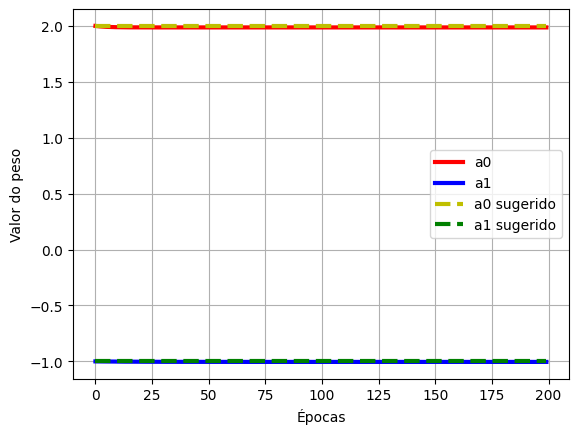

In [132]:
TRUE_a0 = 2
TRUE_a1 = -1

xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b', linewidth=3)
plt.plot(([TRUE_a0] * epochs), 'y--', ([TRUE_a1] * epochs), 'g--',  linewidth=3)
plt.legend(['a0', 'a1', 'a0 sugerido', 'a1 sugerido'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

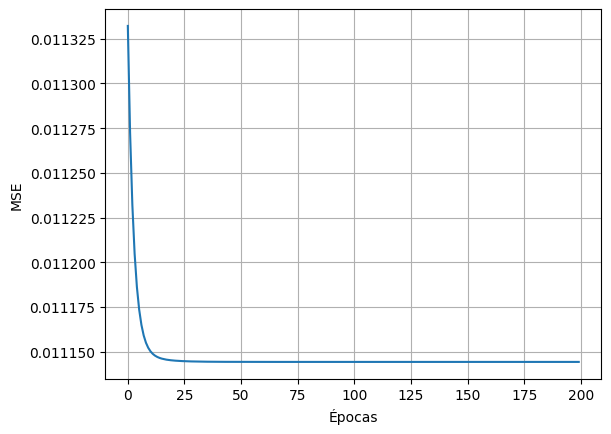

In [133]:
plt.plot(range(epochs), erros)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()

---

**Pergunta 6**: O que ocorreria se o passo de aprendizagem fosse feito igual a 1.1? Altere o valor e execute todas a células novamente.

**Resposta:**
Como a atualização dos pessos, com o passo de aprendizagem novo segue a fórmula

$a_n$  = $a_i$ - $\alpha$*$gradiente$

$\alpha$ = passo de aprendizagem

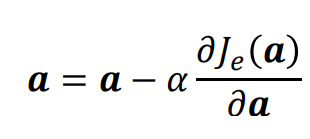

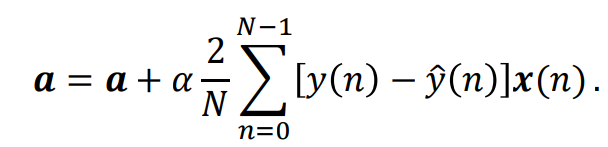


Sempre vao sendo discontado de - alfa*grandiente. ao passo que ele vai decrescer ele passa do valor e sobe novamente, para um valor de peso, maior do que o anteior, assim continuamente, imaginamos, basicamente se multiplicar qualquer valor por 1,1, teremos um valor maior que o anteior, assim subjetivamente, teremos valores cada vez maiores, divergindo.

### Teste

In [92]:
# Passo de aprendizagem.
# testes
LEARNING_RATE = 1.1

# Número de épocas.
epochs = 200

# Instancia o modelo.
model = Model()

# Coletando o histórico de valores a0 e a1 para plotar mais tarde.
list_a0, list_a1 = [], []
erros = []

# Laço (loop) de treinamento.
for epoch in range(epochs):

    # Armazena os valores dos pesos.
    list_a0.append(model.a0.numpy())
    list_a1.append(model.a1.numpy())

    # Iteração de treinamento.
    current_error = train(model, x, y, learning_rate=LEARNING_RATE)

    # Armzena os erros ao longo das épocas de treinamento.
    erros.append(current_error)

    # Imprime os erros ao longo das épocas de treinamento.
    print('Época %2d: a0=%1.2f a1=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Época  0: a0=-3.00 a1=2.00, loss=28.18689
Época  1: a0=8.04 a1=-0.31, loss=36.68880
Época  2: a0=-5.26 a1=-0.69, loss=52.57704
Época  3: a0=10.69 a1=-1.08, loss=75.72781
Época  4: a0=-8.46 a1=-0.83, loss=109.10170
Época  5: a0=14.52 a1=-1.19, loss=157.18784
Época  6: a0=-13.06 a1=-0.78, loss=226.46996
Época  7: a0=20.05 a1=-1.28, loss=326.29126
Época  8: a0=-19.69 a1=-0.68, loss=470.11273
Época  9: a0=28.01 a1=-1.40, loss=677.33002
Época 10: a0=-29.25 a1=-0.54, loss=975.88666
Época 11: a0=39.48 a1=-1.57, loss=1406.04468
Época 12: a0=-43.01 a1=-0.33, loss=2025.81348
Época 13: a0=56.00 a1=-1.82, loss=2918.77148
Época 14: a0=-62.85 a1=-0.03, loss=4205.33740
Época 15: a0=79.81 a1=-2.17, loss=6059.00977
Época 16: a0=-91.43 a1=0.40, loss=8729.76953
Época 17: a0=114.12 a1=-2.69, loss=12577.77734
Época 18: a0=-132.61 a1=1.01, loss=18121.95703
Época 19: a0=163.54 a1=-3.43, loss=26109.96484
Época 20: a0=-191.93 a1=1.90, loss=37619.01562
Época 21: a0=234.75 a1=-4.50, loss=54201.17578
Época 22: a0

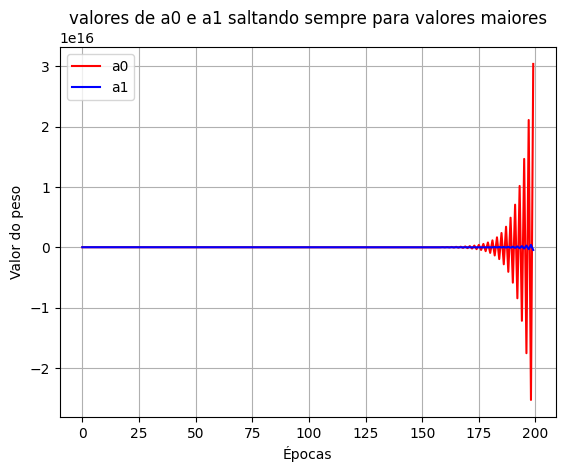

In [100]:
xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b')
plt.title('valores de a0 e a1 saltando sempre para valores maiores')
plt.legend(['a0', 'a1'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

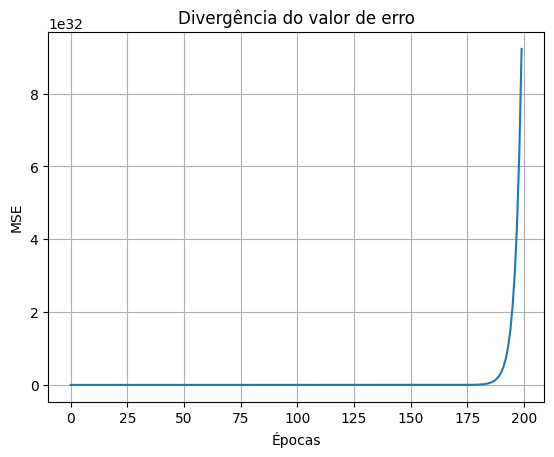

In [96]:
plt.plot(range(epochs), erros)
plt.title('Divergência do valor de erro')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()